## For a given dataset predict number of bikes getting shared based on different parameters 

### Data Preprocessing

In [1]:
# importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  PolynomialFeatures
from sklearn import metrics
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
from ipynb.fs.full.ml_library import *

# importing dataset & storing it as pandas dataframe
bike_data = pd.read_csv('bike_sharing.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Feature selection & removing outliers

In [2]:
# All the steps of data feature column selection & removing outliers
# are done while using multi-linear model you can check all steps there
bike_data.drop(['instant','dteday','holiday','atemp','casual','registered'], axis=1, inplace=True)
bike_data = remove_outliers(bike_data, ['cnt'])

In [3]:
bike_data.shape

(16874, 11)

#### Plotting label data points

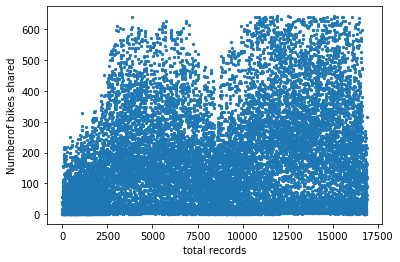

In [4]:
plt.scatter(np.arange(0,16874),bike_data['cnt'], label='data points',s=5)
plt.xlabel('total records')
plt.ylabel('Numberof bikes shared')
plt.show()

In [5]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [6]:
# feature columns
# taking continuous numerical variable columns  or two category categorical columns
numerical_cols = ['temp','hum','windspeed','yr','workingday']
# at least 3 categoried columns 
categorical_cols = ['season','mnth','hr','weekday','weathersit']

# target column
target = 'cnt'

#### Separating out feature & label columns

In [7]:
x_values, y_values, one_hot_encode = data_col_transformation_regression(bike_data, numerical_cols, categorical_cols, target)

In [8]:
x_values.shape

(16874, 56)

#### Creating polynomial features

In [9]:
poly = PolynomialFeatures(degree=2)
x_values = poly.fit_transform(x_values)

In [10]:
x_values.shape

(16874, 1653)

#### Splitting dataset into train set & test set

In [11]:
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size = 0.8, random_state=10) 

### Buliding linear regression model

In [12]:
regressor = LinearRegression()       # creating object from LinearRegression class
regressor.fit(train_x_values, train_y_values)       # building linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Pickling of required objects & storing it into file

In [13]:
import joblib
file = open('PolyRegModel2.pkl','wb')
joblib.dump(numerical_cols, file)
joblib.dump(categorical_cols, file)
joblib.dump(target, file)
joblib.dump(one_hot_encode, file)
joblib.dump(data_col_transformation_regression, file)
joblib.dump(poly, file)
joblib.dump(regressor, file)
file.close()

#### Plotting model vs label data-points

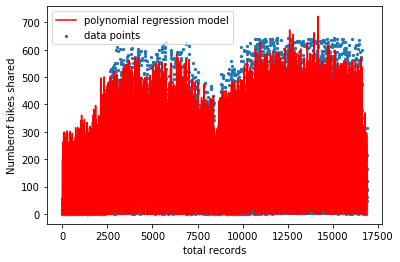

In [14]:
predictions = regressor.predict(x_values)
plt.scatter(np.arange(0,16874),bike_data['cnt'], label='data points',s=5)
plt.plot(np.arange(0,16874), np.where(predictions >0, predictions,0),label='polynomial regression model', c='red')
plt.xlabel('total records')
plt.ylabel('Numberof bikes shared')
plt.legend()
plt.show()

#### Storing predictions for train set

In [15]:
test_prediction = regressor.predict(test_x_values)
test_prediction = np.where(test_prediction > 0, test_prediction, 0)

### Calculating errors

In [16]:
mean_abs_error = metrics.mean_absolute_error(test_y_values, test_prediction)
mean_abs_error

30.333837962962964

In [17]:
mean_sqr_error = metrics.mean_squared_error(test_y_values, test_prediction)
mean_sqr_error

1992.8071554542823

In [18]:
root_mean_sqr_error = np.sqrt(mean_sqr_error)
root_mean_sqr_error

44.640868668231384

### Evaluating model against test set

In [19]:
print(f'r2_score: {metrics.r2_score(test_y_values, test_prediction)}')

r2_score: 0.9193886966110975
